In [67]:
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import twitter
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

from pandas import Series




In [2]:
# Variables that contains the user credentials to access Twitter API 

api = twitter.Api(consumer_key='OcfcqAZGIvtUKWCEO9XfWhCjW',
                      consumer_secret='jnFRZ0daR2xdzy7IEjR6ih98ej44UO2ioEkZg95INwtefXyLJU',
                      access_token_key='54224760-OHpN11y0XuEoycqVaeXj3Bo4m7wFDKoWsAxuNDAdH',
                      access_token_secret='p4iai7fWiuR3o2gCdzPMEgXkjW4e6wbv7I1MQQKbQ6gzn')
# Setup tweepy to authenticate with Twitter credentials


In [3]:
#results = api.GetSearch(
#    raw_query="q=asalto%20since%3A2019-03-06&src=typd&lang=es")
results = api.GetSearch(
   term="ultra2019", count=200, lang="en", return_json=True
   #term="nfl", geocode="19.4326,-99.1332,200mi", since="2019-01-01",count=50, lang="es", return_json=True
   )


In [4]:
print(len(results['statuses']))

100


In [9]:
data=results['statuses']
print(len(results['statuses']))
#print(data[1]['text'])
df=pd.DataFrame.from_dict(data)

100


In [10]:
df_clean=df[['created_at','favorite_count','retweet_count','text']]

In [11]:
df_clean

,created_at,favorite_count,retweet_count,text
0,Mon Apr 01 14:25:18 +0000 2019,2218,472,My @ultra Miami set is here! https://t.co/pVMT...
1,Tue Apr 02 04:46:34 +0000 2019,1218,193,ULTRA 2019!! ❤️ Full set is now live on my You...
2,Mon Apr 01 08:07:24 +0000 2019,3094,391,THANK YOU @ultra ❤️❤️ #ULTRA2019 #Afrojack htt...
3,Wed Apr 03 02:36:51 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...
4,Wed Apr 03 02:36:28 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...
5,Wed Apr 03 02:36:06 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...
6,Wed Apr 03 02:35:45 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...
7,Wed Apr 03 02:33:14 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...
8,Wed Apr 03 02:33:14 +0000 2019,0,53,RT @zPurgee: This was the highlight of @ultra ...
9,Wed Apr 03 02:32:34 +0000 2019,0,0,Baby!! Austin so damn look fucking tired. @lol...


In [14]:
analysis = TextBlob('Mood when they cut off Illenium’s set during the Ultra Live Stream. #Ultra2019')

In [16]:
print(analysis.sentiment)

Sentiment(polarity=0.13636363636363635, subjectivity=0.5)


In [26]:
polarity=[]
subjectivity=[]
sentiment=[]

for tweet in df_clean['text']:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    
    polarity.append(analysis.sentiment[0])
    subjectivity.append(analysis.sentiment[1])
    
    if analysis.sentiment[0]>0:
        sentiment.append('Positive')
    elif analysis.sentiment[0]<0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

My @ultra Miami set is here! https://t.co/pVMTqJ3dW8 #Ultra2019 https://t.co/4BgMEAD66Y
Sentiment(polarity=0.0, subjectivity=0.0)
ULTRA 2019!! ❤️ Full set is now live on my Youtube channel! 🎥🙌 #Ultra2019  https://t.co/aFRyddmN7b https://t.co/oSwHp1EkKv
Sentiment(polarity=0.2602272727272727, subjectivity=0.525)
THANK YOU @ultra ❤️❤️ #ULTRA2019 #Afrojack https://t.co/fH2XwIekUJ
Sentiment(polarity=0.0, subjectivity=0.0)
RT @arilinares10: Hey Twitter I need your help. Met this gorgeous girl at Ultra Friday and Saturday, but couldn’t find her Sunday. And all…
Sentiment(polarity=0.7, subjectivity=0.9)
RT @arilinares10: Hey Twitter I need your help. Met this gorgeous girl at Ultra Friday and Saturday, but couldn’t find her Sunday. And all…
Sentiment(polarity=0.7, subjectivity=0.9)
RT @arilinares10: Hey Twitter I need your help. Met this gorgeous girl at Ultra Friday and Saturday, but couldn’t find her Sunday. And all…
Sentiment(polarity=0.7, subjectivity=0.9)
RT @arilinares10: Hey Twitter I n

In [44]:
df_clean["Sentiment"]=pd.Series(sentiment)


C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_at,favorite_count,retweet_count,text,Sentiment
0,Mon Apr 01 14:25:18 +0000 2019,2218,472,My @ultra Miami set is here! https://t.co/pVMT...,Neutral
1,Tue Apr 02 04:46:34 +0000 2019,1218,193,ULTRA 2019!! ❤️ Full set is now live on my You...,Positive
2,Mon Apr 01 08:07:24 +0000 2019,3094,391,THANK YOU @ultra ❤️❤️ #ULTRA2019 #Afrojack htt...,Neutral
3,Wed Apr 03 02:36:51 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive
4,Wed Apr 03 02:36:28 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive
5,Wed Apr 03 02:36:06 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive
6,Wed Apr 03 02:35:45 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive
7,Wed Apr 03 02:33:14 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive
8,Wed Apr 03 02:33:14 +0000 2019,0,53,RT @zPurgee: This was the highlight of @ultra ...,Negative
9,Wed Apr 03 02:32:34 +0000 2019,0,0,Baby!! Austin so damn look fucking tired. @lol...,Negative


In [45]:
df_clean["Polarity"]=pd.Series(polarity)
df_clean["Subjectivity"]=pd.Series(subjectivity)
df_clean.head(1)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,created_at,favorite_count,retweet_count,text,Sentiment,Polarity,Subjectivity
0,Mon Apr 01 14:25:18 +0000 2019,2218,472,My @ultra Miami set is here! https://t.co/pVMT...,Neutral,0.0,0.0


In [55]:
s=df_clean.groupby('Sentiment').count()
print(s["created_at"])

Sentiment
Negative     4
Neutral     25
Positive    71
Name: created_at, dtype: int64


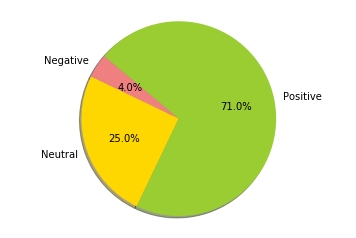

In [60]:
labels = 'Negative','Neutral','Positive'
sizes = [s["created_at"][0],s["created_at"][1],s["created_at"][2]]
colors = ['lightcoral', 'gold','yellowgreen' ]
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

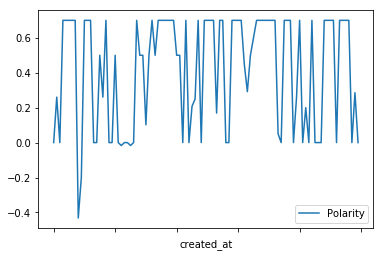

In [66]:
df_clean.plot(x="created_at",y="Polarity")


In [ ]:
#sentiment in time

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

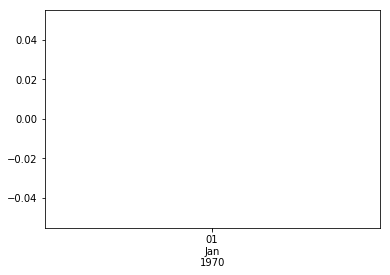

In [79]:
ts

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    NaN
2019-01-04    NaN
2019-01-05    NaN
2019-01-06    NaN
2019-01-07    NaN
2019-01-08    NaN
2019-01-09    NaN
2019-01-10    NaN
2019-01-11    NaN
2019-01-12    NaN
2019-01-13    NaN
2019-01-14    NaN
2019-01-15    NaN
2019-01-16    NaN
2019-01-17    NaN
2019-01-18    NaN
2019-01-19    NaN
2019-01-20    NaN
2019-01-21    NaN
2019-01-22    NaN
2019-01-23    NaN
2019-01-24    NaN
2019-01-25    NaN
2019-01-26    NaN
2019-01-27    NaN
2019-01-28    NaN
2019-01-29    NaN
2019-01-30    NaN
             ... 
2019-03-02    NaN
2019-03-03    NaN
2019-03-04    NaN
2019-03-05    NaN
2019-03-06    NaN
2019-03-07    NaN
2019-03-08    NaN
2019-03-09    NaN
2019-03-10    NaN
2019-03-11    NaN
2019-03-12    NaN
2019-03-13    NaN
2019-03-14    NaN
2019-03-15    NaN
2019-03-16    NaN
2019-03-17    NaN
2019-03-18    NaN
2019-03-19    NaN
2019-03-20    NaN
2019-03-21    NaN
2019-03-22    NaN
2019-03-23    NaN
2019-03-24    NaN
2019-03-25    NaN
2019-03-26

In [91]:
import time
ts1=[]
for tweet in df_clean['created_at']:
    ts1.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet,'%a %b %d %H:%M:%S +0000 %Y')))
df_clean["time"]=pd.Series(ts1)
df_clean.head(1)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,created_at,favorite_count,retweet_count,text,Sentiment,Polarity,Subjectivity,time
0,Mon Apr 01 14:25:18 +0000 2019,2218,472,My @ultra Miami set is here! https://t.co/pVMT...,Neutral,0.0,0.0,2019-04-01 14:25:18


In [105]:
df_sort=df_clean.sort_values(by='time')
df_sort=df_sort.reset_index()
df_sort.head(10)


,index,created_at,favorite_count,retweet_count,text,Sentiment,Polarity,Subjectivity,time
0,2,Mon Apr 01 08:07:24 +0000 2019,3094,391,THANK YOU @ultra ❤️❤️ #ULTRA2019 #Afrojack htt...,Neutral,0.000000,0.000000,2019-04-01 08:07:24
1,0,Mon Apr 01 14:25:18 +0000 2019,2218,472,My @ultra Miami set is here! https://t.co/pVMT...,Neutral,0.000000,0.000000,2019-04-01 14:25:18
2,1,Tue Apr 02 04:46:34 +0000 2019,1218,193,ULTRA 2019!! ❤️ Full set is now live on my You...,Positive,0.260227,0.525000,2019-04-02 04:46:34
3,99,Wed Apr 03 01:01:33 +0000 2019,0,6,"RT @EDMManiac: Despite the initial hiccups, #U...",Neutral,0.000000,0.375000,2019-04-03 01:01:33
4,98,Wed Apr 03 01:02:02 +0000 2019,1,0,That’s family right there #ULTRA2019 https://t...,Positive,0.285714,0.535714,2019-04-03 01:02:02
5,97,Wed Apr 03 01:02:32 +0000 2019,0,1025,RT @dancingastro: Ultra day 2 is already snapp...,Neutral,0.000000,0.000000,2019-04-03 01:02:32
6,96,Wed Apr 03 01:03:18 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive,0.700000,0.900000,2019-04-03 01:03:18
7,95,Wed Apr 03 01:03:18 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive,0.700000,0.900000,2019-04-03 01:03:18
8,94,Wed Apr 03 01:03:19 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive,0.700000,0.900000,2019-04-03 01:03:19
9,93,Wed Apr 03 01:03:37 +0000 2019,0,502,RT @arilinares10: Hey Twitter I need your help...,Positive,0.700000,0.900000,2019-04-03 01:03:37


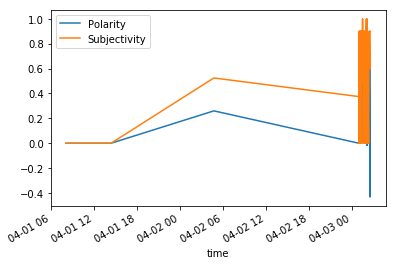

In [107]:
df_sort["time"] = pd.to_datetime(df_sort['time'])
df_sort.plot(x="time", y=["Polarity","Subjectivity"])
plt.show()